In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from quantum_backend.quantum_state import QJob
from qiskit.visualization import circuit_drawer
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit import transpile
import sys
from pathlib import Path

In [2]:
sys.path.append(str(Path(".").resolve()))

with open("qga_report.json", "r") as f:
    data = json.load(f)

summary = data["summary"]
hist = pd.DataFrame(data["history"])

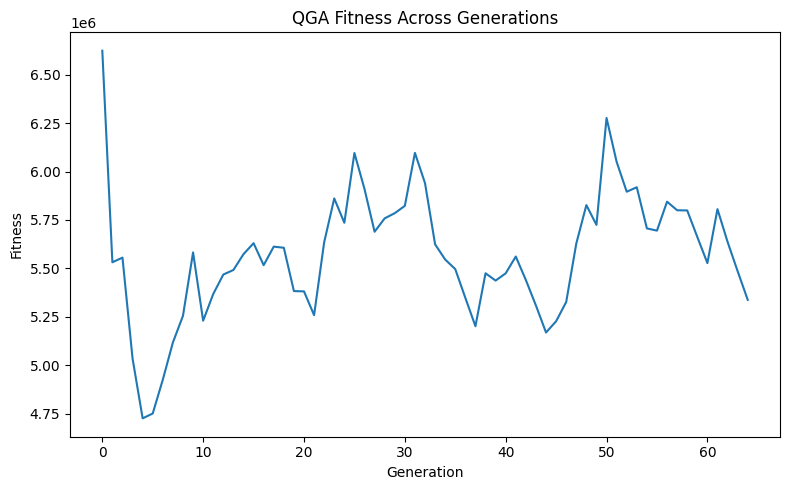

In [3]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=hist, x="generation", y="best_fit", markers=False)
plt.title("QGA Fitness Across Generations")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.tight_layout()
plt.show()

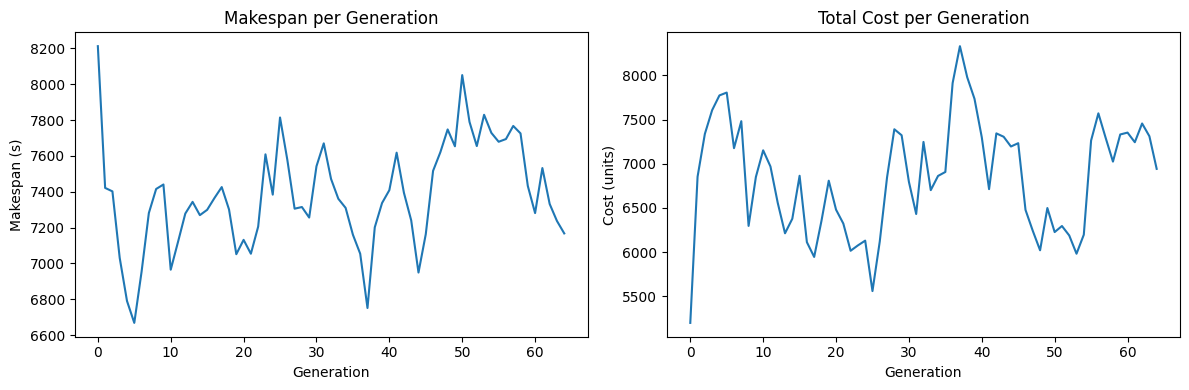

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.lineplot(data=hist, x="generation", y="makespan", ax=axes[0])
axes[0].set_title("Makespan per Generation")
axes[0].set_xlabel("Generation")
axes[0].set_ylabel("Makespan (s)")

sns.lineplot(data=hist, x="generation", y="total_cost", ax=axes[1])
axes[1].set_title("Total Cost per Generation")
axes[1].set_xlabel("Generation")
axes[1].set_ylabel("Cost (units)")

plt.tight_layout()
plt.show()


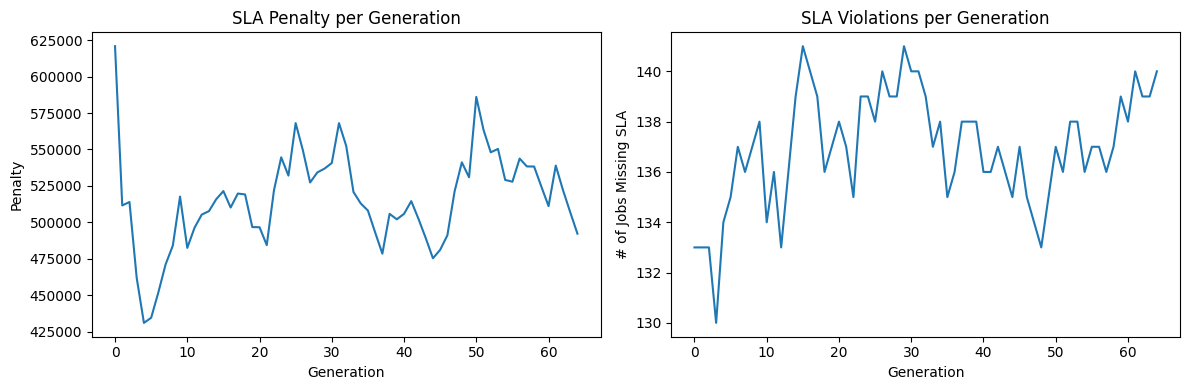

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.lineplot(data=hist, x="generation", y="sla_penalty", ax=axes[0])
axes[0].set_title("SLA Penalty per Generation")
axes[0].set_xlabel("Generation")
axes[0].set_ylabel("Penalty")

sns.lineplot(data=hist, x="generation", y="sla_violations", ax=axes[1])
axes[1].set_title("SLA Violations per Generation")
axes[1].set_xlabel("Generation")
axes[1].set_ylabel("# of Jobs Missing SLA")

plt.tight_layout()
plt.show()


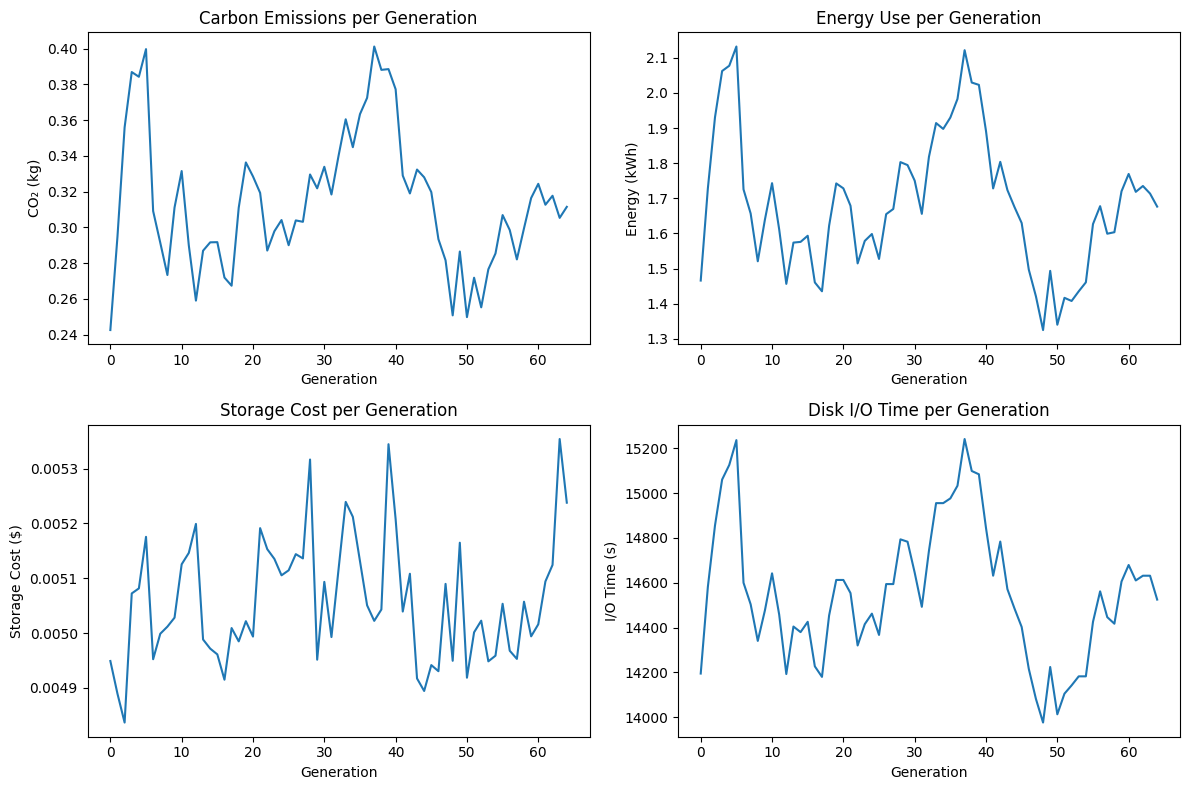

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.lineplot(data=hist, x="generation", y="carbon_kg_total", ax=axes[0, 0])
axes[0, 0].set_title("Carbon Emissions per Generation")
axes[0, 0].set_ylabel("CO₂ (kg)")

sns.lineplot(data=hist, x="generation", y="energy_kwh_total", ax=axes[0, 1])
axes[0, 1].set_title("Energy Use per Generation")
axes[0, 1].set_ylabel("Energy (kWh)")

sns.lineplot(data=hist, x="generation", y="storage_cost_total", ax=axes[1, 0])
axes[1, 0].set_title("Storage Cost per Generation")
axes[1, 0].set_ylabel("Storage Cost ($)")

sns.lineplot(data=hist, x="generation", y="io_time_total_sec", ax=axes[1, 1])
axes[1, 1].set_title("Disk I/O Time per Generation")
axes[1, 1].set_ylabel("I/O Time (s)")

for ax in axes.flat:
    ax.set_xlabel("Generation")

plt.tight_layout()
plt.show()


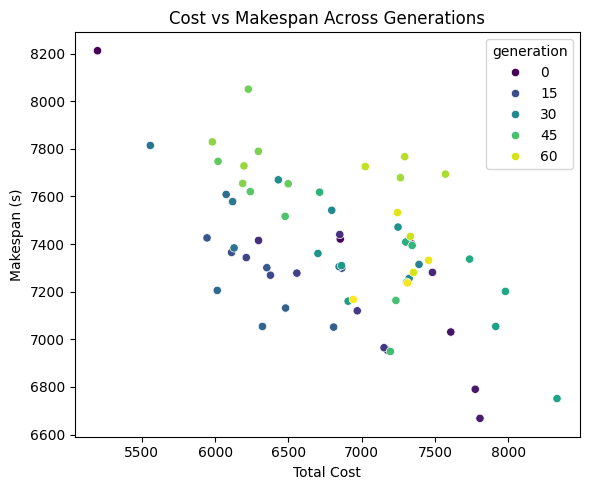

In [7]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=hist, x="total_cost", y="makespan",
                hue="generation", palette="viridis")
plt.title("Cost vs Makespan Across Generations")
plt.xlabel("Total Cost")
plt.ylabel("Makespan (s)")
plt.tight_layout()
plt.show()


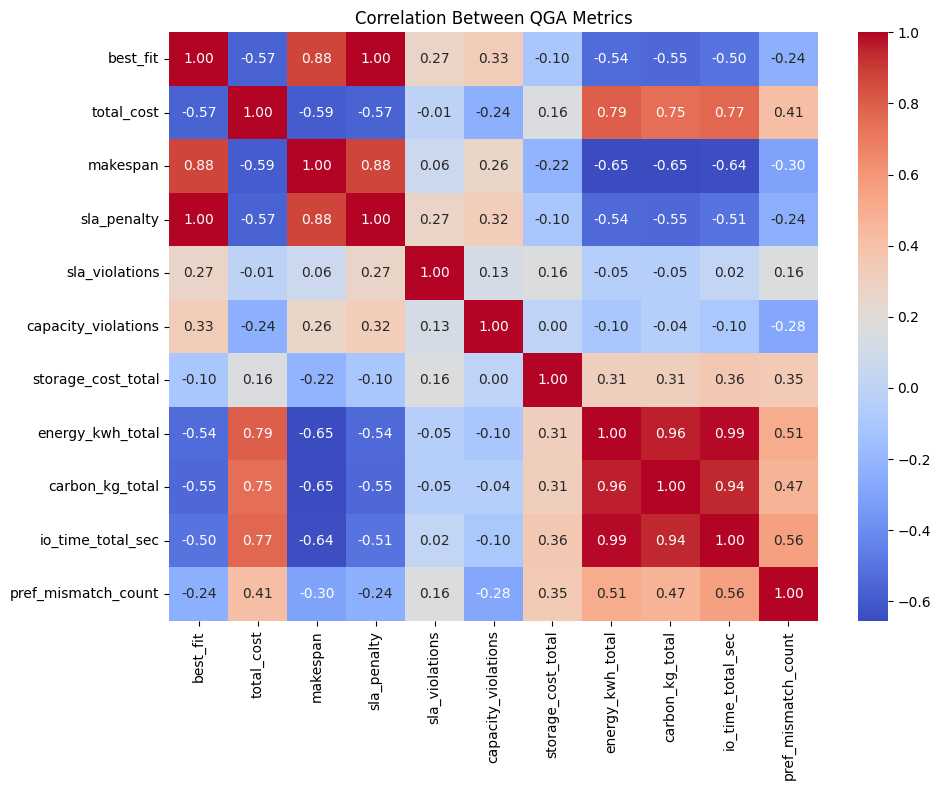

In [8]:
metrics_cols = [
    "best_fit", "total_cost", "makespan", "sla_penalty",
    "sla_violations", "capacity_violations",
    "storage_cost_total", "energy_kwh_total",
    "carbon_kg_total", "io_time_total_sec",
    "pref_mismatch_count"
]

corr = hist[metrics_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Between QGA Metrics")
plt.tight_layout()
plt.show()


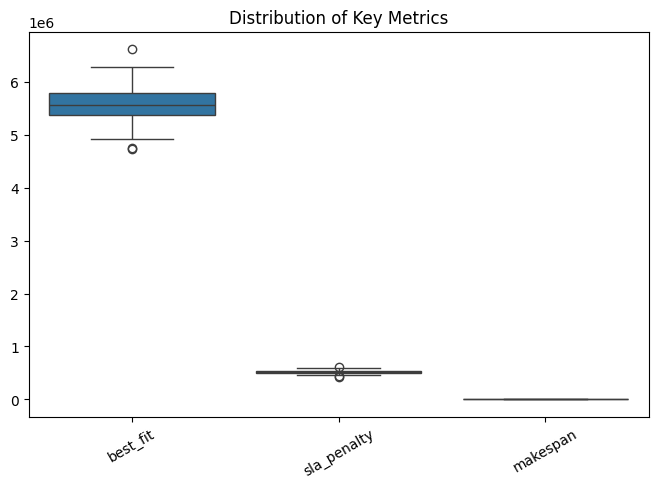

In [9]:
plt.figure(figsize=(8,5))
sns.boxplot(data=hist[["best_fit", "sla_penalty", "makespan"]])
plt.title("Distribution of Key Metrics")
plt.xticks(rotation=30)
plt.show()

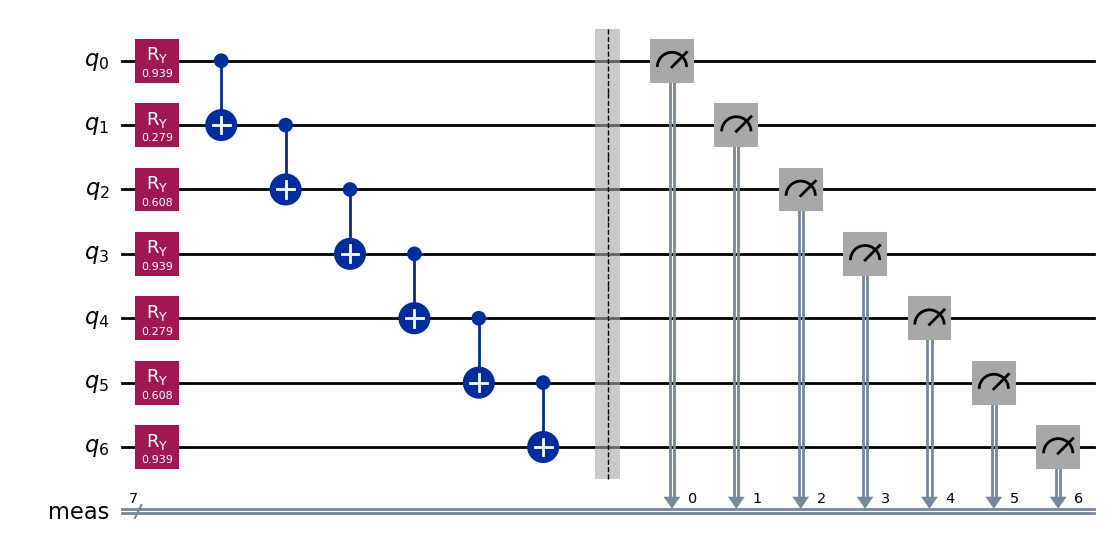

In [10]:
qjob = QJob(num_qubits=7)
qc = qjob.build_circuit()

circuit_drawer(qc, output="mpl")

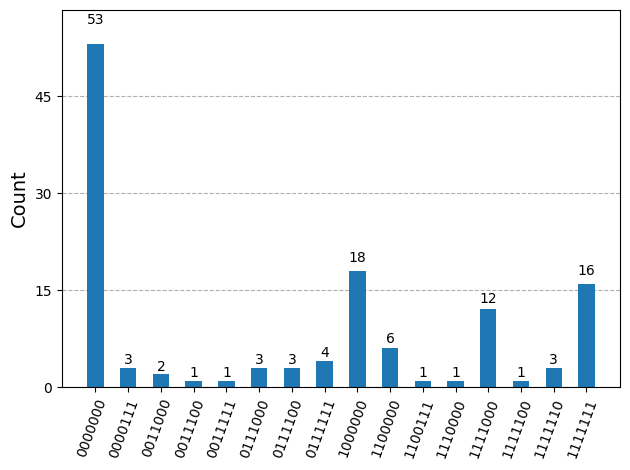

In [11]:
sim = AerSimulator()
tqc = transpile(qc, sim, optimization_level=0)
result = sim.run(tqc, shots=128).result()
counts = result.get_counts()

plot_histogram(counts)